# Assignment - 5

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading csv file to the pandas dataframe

missing_values = ['?']
df = pd.read_csv('adult.csv',na_values = missing_values)

- We have replaced the missing values from the dataset which are present in the form of '?' to NaN while loading the data.

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


<b>For Exploratory Data Analysis refer </b> :- https://github.com/pooja1207/CIPHERSCHOOLS__ML1/tree/master/Assignment-4

## Treating Missing Values

In [4]:
# Identifying the missing values in the columns.

df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

#### Observation
- There are 2799, 2809 and 857 missing values in workclass, occupation and native-country respectively.

### Missing Value Pattern

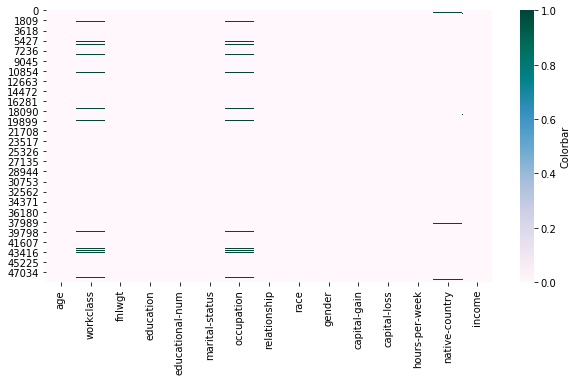

In [5]:
# Pattern of missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=True,cmap="PuBuGn",cbar_kws={'label': 'Colorbar'})

#### Observation
- There are 7% missing values.
- There are missing values in three columns : workclass, occupation and native-country.
- There is no relationship between the missingness of the native-region and any other features. Those missing data points of native-region are a random subset of the data. Therefore, the missing values of native-region are Missing Completely at Random (MCAR).
- When the workclass of a worker is missing, his occupation is also missing but vice-versa is not true. Therefore, we can conclude that missingness of workclass is dependent on missingness of occupation. Therefore, the missing values of workclass and occupation are following the Missing at Random (MAR) pattern.

### Handling the missing values

In [6]:
# Removing all the missing values by removing the rows where missing values occur

new_df=df.dropna()

# we have removed all the rows which have missing values

new_df.info()
print("\n")
print('*'*150)
new_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


**************************************************************************

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


### Percentage of data loss

In [7]:
# Percentage of rows that were removed while handling missing values

# perc = ((df.shape[0]-new_df.shape[0])/df.shape[0])*100

fraction = 1-(len(new_df.index)/len(df.index))
perc = fraction*100
print("Percentage of removed rows : {:.2f}%".format(perc))

Percentage of removed rows : 7.41%


#### Observation
- After removing all the missing values, there are 45222 rows left.
- Percentage of rows that were removed = (48842 - 45222 / 48842)*100 = 7.41%

## Removing the unneccesary column 'fnlwgt'

In [8]:
# Removing the ‘fnlwgt’ column  as it has no predictive power

new_df = new_df.drop(columns = "fnlwgt")
new_df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


## Data Preparation

In [9]:
# Seperating numerical data

numerical = new_df.select_dtypes(include=['int64', 'float64'])

numerical.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
5,34,6,0,0,30


In [10]:
# Seperating categorical features 

categorical = new_df.select_dtypes(include=['object'])

categorical.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [11]:
# Standardizing numerical data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

df_num = pd.DataFrame(scaler.fit_transform(numerical), 
                      columns = numerical.columns)

df_num.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942


In [12]:
# Encoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

df_cat = pd.DataFrame(encoder.fit_transform(categorical), 
                      columns=encoder.get_feature_names(categorical.columns))

df_cat.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [13]:
# Merging standardised numerical and categorical dataframes

df = pd.concat([df_num, df_cat], axis=1)

# Renaming column name

df = df.rename(columns={'gender_Male': 'gender','income_>50K':'income'})

df

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,-0.873671,0.737034,-0.146733,-0.21878,-0.244684,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45218,0.109857,-0.438122,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
45219,1.471665,-0.438122,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45220,-1.251951,-0.438122,-0.146733,-0.21878,-1.743763,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Input Variables And Target Variable

In [14]:
# Considering ‘income’ as the target variable therefore poping it from dataframe and storing in 'y' variable.

y = df.pop('income')

X = df

- Income is target variable stored in 'y' and rest are stored in 'x' are input variable

### Now we will Split the data into train and test
- 75% Training Data
- 25% Testing Data
- Random State 100

In [15]:
# Spliting into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [16]:
# Shape of train-test

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(33916, 95) (33916,)
(11306, 95) (11306,)


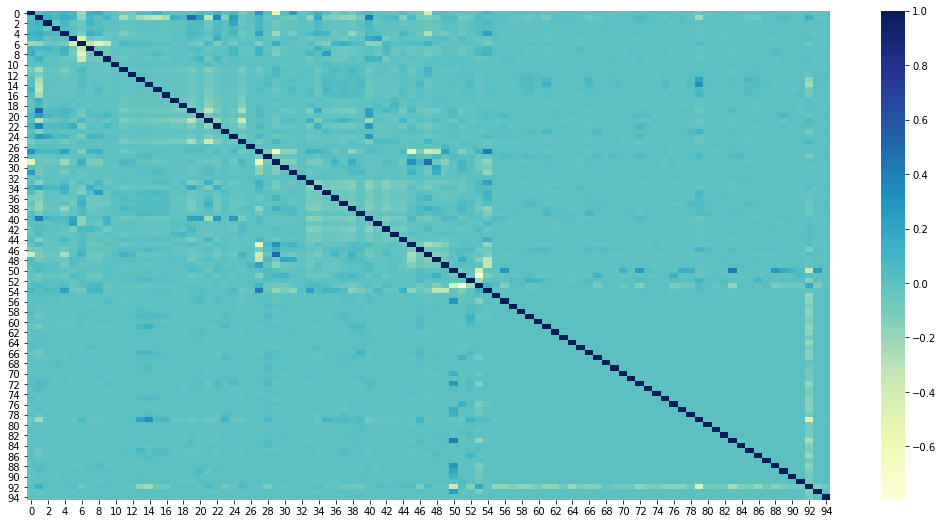

In [17]:
# Correlation Map

corrmat = np.corrcoef(X_train.T)

plt.figure(figsize=(18, 9))

sns.heatmap(corrmat, cmap="YlGnBu")

#### Observation
- This map showing that the among 95 input variables many features are also dependent on each other which is to be removed later.

# Data Modelling

## 1. Logistic Regression

### 1.1 Model Building 

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=300)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 1.2 Making Predictions

In [19]:
# Predicting income of the test data

y_pred = classifier.predict(X_test)

In [20]:
# Calculating the probability 

pred_prob = classifier.predict_proba(X_test)

np.around(pred_prob, decimals = 2)

array([[0.9 , 0.1 ],
       [0.65, 0.35],
       [0.74, 0.26],
       ...,
       [0.95, 0.05],
       [0.95, 0.05],
       [0.95, 0.05]])

### NOTE :-

#### predict_proba
The function predict_proba() returns a numpy array of number of categories in target variable. The first column is the probability that target=0 and the second column is the probability that target=1.

#### np.arround
Evenly round array elements to the given number of decimals.

In [21]:
# Comparison of actual vs presicted

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

temp_df.head()

,Actual,Predicted
40273,0.0,0.0
1984,1.0,0.0
1230,1.0,0.0
25507,0.0,0.0
553,0.0,1.0


### 1.3 Evaluation

In [22]:
# calculate accuracy, precision and recall of class predictions on 95 features

from sklearn import metrics
lr_acc = metrics.accuracy_score(y_test, y_pred)
lr_pre = metrics.precision_score(y_test, y_pred)
lr_recall = metrics.recall_score(y_test, y_pred)
print("Accuracy  : "+str(lr_acc))
print("Precision : "+str(lr_pre))
print("Recall    : "+str(lr_recall))

Accuracy  : 0.8511409870865028
Precision : 0.7434094903339191
Recall    : 0.6062343246148334


In [23]:
# Confusion Matrix

con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[7931,  584],
       [1099, 1692]], dtype=int64)

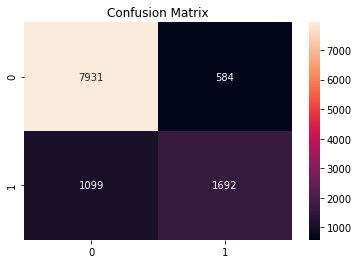

In [24]:
#ploting heatmap for confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

#### Observation

- Correct classified vaules : 7931+1692 = 9627 <br>
- Mis-classified values : 1099+584 =1683

In [25]:
# Classification Report

print(metrics.classification_report(y_test,y_pred))

# Number of features = 97

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      8515
         1.0       0.74      0.61      0.67      2791

    accuracy                           0.85     11306
   macro avg       0.81      0.77      0.79     11306
weighted avg       0.84      0.85      0.85     11306



## 2. K - Nearest Neighbors

### 2.1 Model Building

In [26]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### 2.2 Making Predictions

In [27]:
# Predicting income of the test data

y_pred = classifier.predict(X_test)

In [28]:
# Calculating the probability 

pred_prob = classifier.predict_proba(X_test)

np.around(pred_prob, decimals = 2)

array([[1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

In [29]:
# Comparison of actual vs presicted

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

temp_df.head()

,Actual,Predicted
40273,0.0,0.0
1984,1.0,1.0
1230,1.0,0.0
25507,0.0,0.0
553,0.0,1.0


### 2.3 Evaluation

In [30]:
# calculate accuracy, precision and recall of class predictions on 95 features

from sklearn import metrics
knn_acc = metrics.accuracy_score(y_test, y_pred)
knn_pre = metrics.precision_score(y_test, y_pred)
knn_recall = metrics.recall_score(y_test, y_pred)
print("Accuracy  : "+str(knn_acc))
print("Precision : "+str(knn_pre))
print("Recall    : "+str(knn_recall))

Accuracy  : 0.8374314523261985
Precision : 0.6856252434748734
Recall    : 0.6305983518452167


In [31]:
# Confusion Matrix

con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[7708,  807],
       [1031, 1760]], dtype=int64)

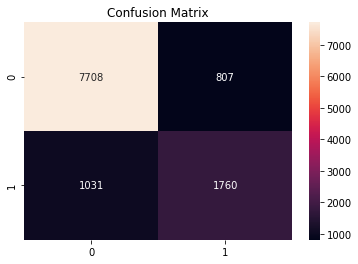

In [32]:
# ploting heatmap for confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

#### Observation
- Correct classified vaules : 7708+1760 = 9468
- Mis-classified values : 1031+807 =1838

## 3. Decision-Tree

### 3.1 Model Building

In [33]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### 3.2 Making Predictions

In [34]:
# Predicting income of the test data

y_pred = classifier.predict(X_test)

In [35]:
# Calculating the probability 

pred_prob = classifier.predict_proba(X_test)

np.around(pred_prob, decimals = 2)

array([[0.69, 0.31],
       [0.69, 0.31],
       [0.69, 0.31],
       ...,
       [0.85, 0.15],
       [0.85, 0.15],
       [0.85, 0.15]])

In [36]:
# Comparison of actual vs presicted

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

temp_df.head()

,Actual,Predicted
40273,0.0,0.0
1984,1.0,0.0
1230,1.0,0.0
25507,0.0,0.0
553,0.0,0.0


### 3.3 Evaluation

In [37]:
# calculate accuracy, precision and recall of class predictions on 95 features

from sklearn import metrics
dt_acc = metrics.accuracy_score(y_test, y_pred)
dt_pre = metrics.precision_score(y_test, y_pred)
dt_recall = metrics.recall_score(y_test, y_pred)
print("Accuracy  : "+str(dt_acc))
print("Precision : "+str(dt_pre))
print("Recall    : "+str(dt_recall))

Accuracy  : 0.8412347426145409
Precision : 0.7683189655172413
Recall    : 0.5109279828018631


In [38]:
# Confusion Matrix

con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[8085,  430],
       [1365, 1426]], dtype=int64)

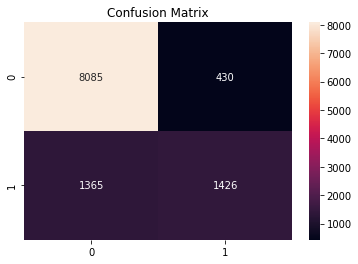

In [39]:
# ploting heatmap for confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

#### Observation

- Correct classified vaules : 8088+1241 = 9329 <br>
- Mis-classified values : 1550+427 = 1977

In [40]:
# Classification Report

print(metrics.classification_report(y_test,y_pred))

# Number of features = 97

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      8515
         1.0       0.77      0.51      0.61      2791

    accuracy                           0.84     11306
   macro avg       0.81      0.73      0.76     11306
weighted avg       0.83      0.84      0.83     11306



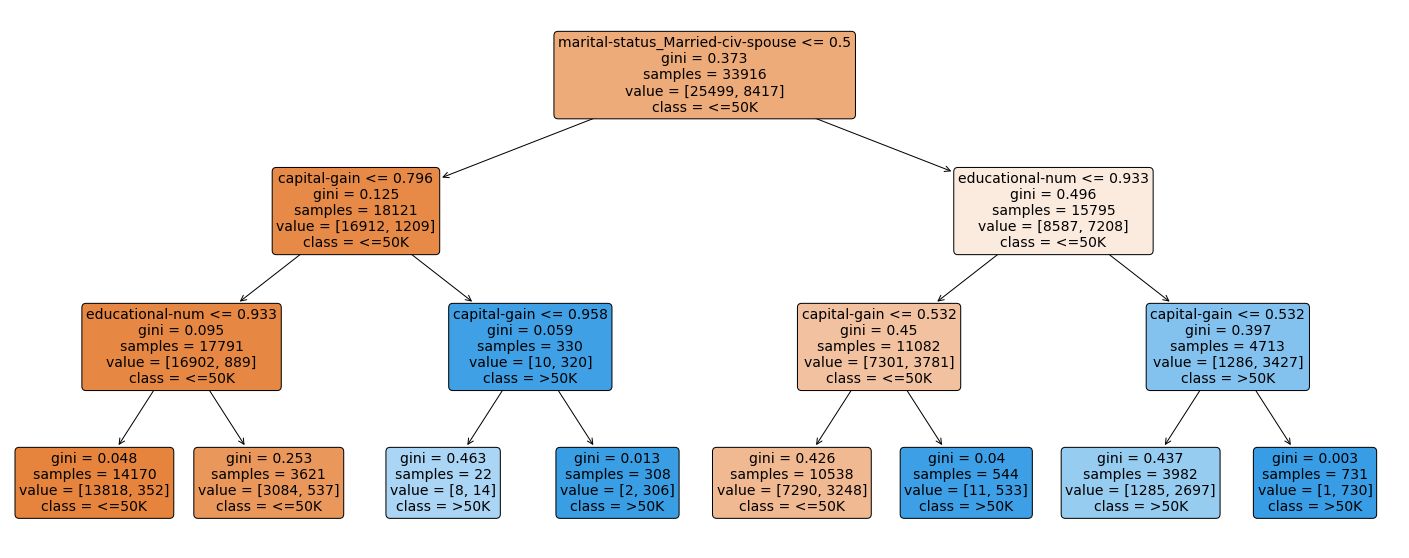

In [41]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
f = plot_tree(classifier, feature_names = X_train.columns, 
              class_names=['<=50K','>50K'] ,
              filled = True, 
              rounded = True, 
              fontsize = 14
             )

## 4. SVM - Support Vector Machine

### 4.1 Model Building 

In [42]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### 4.2 Making Predictions

In [43]:
# Predicting income of the test data

y_pred = classifier.predict(X_test)

In [44]:
# Comparison of actual vs presicted

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

temp_df.head()

,Actual,Predicted
40273,0.0,0.0
1984,1.0,0.0
1230,1.0,0.0
25507,0.0,0.0
553,0.0,1.0


### 4.3 Evaluation

In [45]:
# calculate accuracy, precision and recall of class predictions on 95 features

from sklearn import metrics
svm_acc = metrics.accuracy_score(y_test, y_pred)
svm_pre = metrics.precision_score(y_test, y_pred)
svm_recall = metrics.recall_score(y_test, y_pred)
print("Accuracy  : "+str(svm_acc))
print("Precision : "+str(svm_pre))
print("Recall    : "+str(svm_recall))

Accuracy  : 0.8532637537590659
Precision : 0.7632558139534884
Recall    : 0.5879613041920458


In [46]:
# Confusion Matrix

con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[8006,  509],
       [1150, 1641]], dtype=int64)

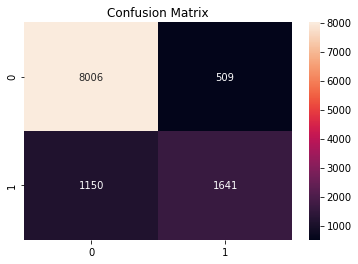

In [47]:
# ploting heatmap for confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

#### Observation

- Correct classified vaules : 8006+1641 = 9647 <br>
- Mis-classified values : 1150+509 = 1659

In [48]:
# Classification Report

print(metrics.classification_report(y_test,y_pred))

# Number of features = 97

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91      8515
         1.0       0.76      0.59      0.66      2791

    accuracy                           0.85     11306
   macro avg       0.82      0.76      0.79     11306
weighted avg       0.85      0.85      0.85     11306



## Conclusion on 95 features

In [49]:
adult_acc={}
L = ['Logistic Regression','K-Nearest Neighbors','Decision Tree','SVM']
acc = [lr_acc,knn_acc,dt_acc,svm_acc]
for i in range(4):
  adult_acc[L[i]]=round((acc[i]*100),2)
adult_acc
acc_table = pd.DataFrame.from_dict(adult_acc,orient='index',columns=['Accuracy (col=95)'])
acc_table

,Accuracy (col=95)
Logistic Regression,85.11
K-Nearest Neighbors,83.74
Decision Tree,84.12
SVM,85.33


#### Observation 
- On 95 features, logistic regression and svm is giving highest accuracy of 85%.

## Feature Elimination - RFE

##### Using RFE to extract the best features

In [50]:
from sklearn.linear_model import LogisticRegression
classifier_temp = LogisticRegression(max_iter=300)

In [51]:
# Importing RFE
from sklearn.feature_selection import RFE

# Creating a object of RFE and selecting 20 most important features
rfe = RFE(classifier_temp, 20)
rfe = rfe.fit(X_train, y_train)

In [52]:
# Showing features ranking using rfe.support_

temp_df = pd.DataFrame({'Columns' : X_train.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})

temp_df

,Columns,Included,Ranking
0,age,False,25
1,educational-num,True,1
2,capital-gain,True,1
3,capital-loss,False,38
4,hours-per-week,False,24
...,...,...,...
90,native-country_Thailand,False,15
91,native-country_Trinadad&Tobago,True,1
92,native-country_United-States,False,43
93,native-country_Vietnam,True,1


In [53]:
# imp_col is a 1-d array contains all important column according to its ranking

imp_col = X_train.columns[rfe.support_]
imp_col

Index(['educational-num', 'capital-gain', 'education_1st-4th',
       'education_5th-6th', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'relationship_Other-relative',
       'relationship_Own-child', 'native-country_Columbia',
       'native-country_Dominican-Republic', 'native-country_Guatemala',
       'native-country_Mexico', 'native-country_Peru',
       'native-country_Scotland', 'native-country_Trinadad&Tobago',
       'native-country_Vietnam'],
      dtype='object')

In [54]:
# X_train_new is a dataframe containing only important columns

X_train_new = X_train[imp_col]

X_train_new.head()

,educational-num,capital-gain,education_1st-4th,education_5th-6th,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Other-service,occupation_Priv-house-serv,relationship_Other-relative,relationship_Own-child,native-country_Columbia,native-country_Dominican-Republic,native-country_Guatemala,native-country_Mexico,native-country_Peru,native-country_Scotland,native-country_Trinadad&Tobago,native-country_Vietnam
4391,-2.004996,-0.146733,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
42047,-0.046403,-0.146733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18562,-0.438122,-0.146733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37936,-0.438122,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32942,1.520471,-0.146733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###  Using Logistic Regression on Best Features

##### Model Preparation on best features

In [55]:
from sklearn.linear_model import LogisticRegression
classifier_new = LogisticRegression()
classifier_new.fit(X_train_new, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### Model Prediction on best features 

In [56]:
X_test_new = X_test[imp_col]
y_pred_new = classifier_new.predict(X_test_new)

##### Model Evaluation after RFE

In [57]:
temp_df_new = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_new})
temp_df_new

,Actual,Predicted
40273,0.0,0.0
1984,1.0,0.0
1230,1.0,0.0
25507,0.0,0.0
553,0.0,0.0
...,...,...
3700,1.0,1.0
30164,0.0,0.0
27551,0.0,0.0
10019,0.0,0.0


In [58]:
# calculate accuracy, precision and recall of class predictions on 20 features after RFE

from sklearn import metrics
lr_acc_rfe = metrics.accuracy_score(y_test, y_pred_new)
lr_pre_rfe = metrics.precision_score(y_test, y_pred_new)
lr_recall_rfe = metrics.recall_score(y_test, y_pred_new)
print("Accuracy  : "+str(lr_acc_rfe))
print("Precision : "+str(lr_pre_rfe))
print("Recall    : "+str(lr_recall_rfe))

Accuracy  : 0.839908013444189
Precision : 0.7443946188340808
Recall    : 0.5352920100322465


#### Observation
- Accuracy of the model after RFE using Logistic Regression on important column i.e 20 columns according to its ranking is 83.99%.

In [59]:
# Classification report after performing rfe

print(metrics.classification_report(y_test,y_pred_new))

# Number of features = 20

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      8515
         1.0       0.74      0.54      0.62      2791

    accuracy                           0.84     11306
   macro avg       0.80      0.74      0.76     11306
weighted avg       0.83      0.84      0.83     11306



### Conclusion After RFE on 20 features

In [60]:
acc_rfe={"Logistic Regression":round((lr_acc_rfe*100),2)}
acc_rfe_table = pd.DataFrame.from_dict(acc_rfe,orient='index',columns=['Accuracy_RFE (col=20)'])
acc_rfe_table

,Accuracy_RFE (col=20)
Logistic Regression,83.99


## PCA

##### Using PCA to extract those features which almost define the whole data 

In [61]:
# Importing PCA

from sklearn.decomposition import PCA
pca = PCA(random_state = 0)

In [62]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

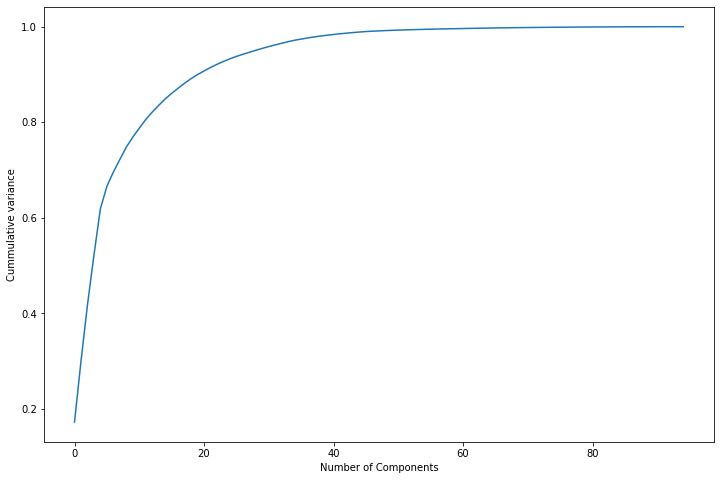

In [63]:
# Ploting curve between cummulative variance and number of components

plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cummulative variance')
plt.show()

In [64]:
# Variance Ratio

np.cumsum(pca.explained_variance_ratio_)

array([0.17232007, 0.29956877, 0.4175257 , 0.5217632 , 0.61901669,
       0.66573953, 0.69567167, 0.7220128 , 0.74797703, 0.76873561,
       0.78747472, 0.80561522, 0.82116013, 0.83527853, 0.84875128,
       0.86043796, 0.87113547, 0.88165365, 0.89121147, 0.89975381,
       0.90733124, 0.91462747, 0.92115571, 0.92725591, 0.93270793,
       0.9377766 , 0.94225452, 0.946453  , 0.95056724, 0.95454843,
       0.95838992, 0.96189569, 0.96529533, 0.9686306 , 0.97166791,
       0.97402693, 0.97634686, 0.97852867, 0.98045414, 0.98212232,
       0.98369091, 0.98519365, 0.9864503 , 0.98768261, 0.98880844,
       0.98982661, 0.99058893, 0.99123881, 0.9918049 , 0.99235313,
       0.99284136, 0.99328677, 0.99369081, 0.99404727, 0.99439426,
       0.99472417, 0.9950332 , 0.99533686, 0.99563086, 0.99589537,
       0.99615323, 0.99640899, 0.99665457, 0.99689392, 0.99712631,
       0.99734466, 0.99755431, 0.99773792, 0.99792009, 0.99809199,
       0.99824682, 0.99838842, 0.998528  , 0.99866095, 0.99878

In [96]:
from sklearn.decomposition import PCA

# selecting 20 columns which covers almost 90% of data
pca_final = PCA(n_components = 20, random_state = 0)

X_train_pca = pca_final.fit_transform(X_train)

In [66]:
X_train_pca.shape

(33916, 5)

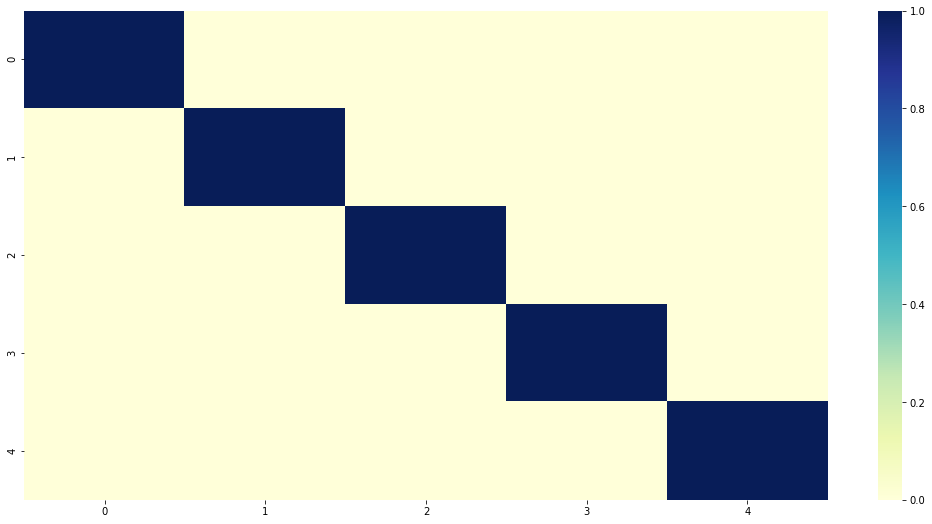

In [67]:
# Correlation Map

corrmat = np.corrcoef(X_train_pca.T)

plt.figure(figsize=(18, 9))

sns.heatmap(corrmat, cmap="YlGnBu")

#### Observation

- Input variables are sightly dependent on each other.

### - Logistic Regression After PCA

In [68]:
# Building the final model with 20 features

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
# Predicting the model after PCA

X_test_pca = pca_final.fit_transform(X_test)
y_pred_pca = classifier.predict(X_test_pca)

In [70]:
# calculate accuracy, precision and recall of class predictions on 20 features after pca

from sklearn import metrics
lr_acc_pca = metrics.accuracy_score(y_test, y_pred_pca)
lr_pre_pca = metrics.precision_score(y_test, y_pred_pca)
lr_recall_pca = metrics.recall_score(y_test, y_pred_pca)
print("Accuracy  : "+str(lr_acc_pca))
print("Precision : "+str(lr_pre_pca))
print("Recall    : "+str(lr_recall_pca))

Accuracy  : 0.7877233327436759
Precision : 0.6329027872195785
Recall    : 0.3335721963453959


In [71]:
# Confusion Matrix

con_metric = metrics.confusion_matrix(y_test, y_pred_pca)
con_metric

array([[7975,  540],
       [1860,  931]], dtype=int64)

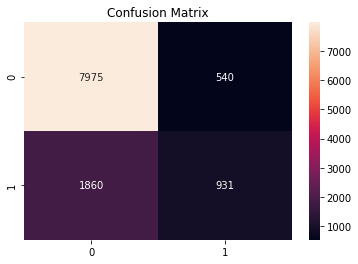

In [72]:
# ploting heatmap for confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

#### Observation

- Correct classified vaules : 7877+1422 = 9299 <br>
- Mis-classified values : 1369+638 = 2007

In [73]:
# Clasification Report After PCA

print(metrics.classification_report(y_test,y_pred_pca))

# Number of features = 20

              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87      8515
         1.0       0.63      0.33      0.44      2791

    accuracy                           0.79     11306
   macro avg       0.72      0.64      0.65     11306
weighted avg       0.77      0.79      0.76     11306



### - KNN After PCA

In [74]:
# Building the final model with 20 features

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [75]:
# Predicting the model after PCA

X_test_pca = pca_final.fit_transform(X_test)
y_pred_pca = classifier.predict(X_test_pca)

In [76]:
# calculate accuracy, precision and recall of class predictions on 20 features after pca

from sklearn import metrics
knn_acc_pca = metrics.accuracy_score(y_test, y_pred_pca)
knn_pre_pca = metrics.precision_score(y_test, y_pred_pca)
knn_recall_pca = metrics.recall_score(y_test, y_pred_pca)
print("Accuracy  : "+str(knn_acc_pca))
print("Precision : "+str(knn_pre_pca))
print("Recall    : "+str(knn_recall_pca))

Accuracy  : 0.7516362993101008
Precision : 0.49516770892552586
Recall    : 0.31207452525976354


In [77]:
# Confusion Matrix

con_metric = metrics.confusion_matrix(y_test, y_pred_pca)
con_metric

array([[7627,  888],
       [1920,  871]], dtype=int64)

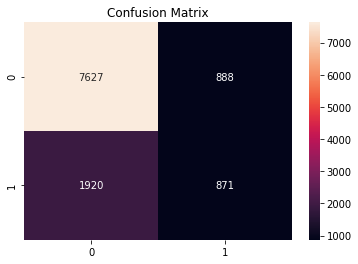

In [78]:
# ploting heatmap for confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

#### Observation

- Correct classified vaules : 7558+1393 = 8956 <br>
- Mis-classified values : 1398+957 = 2315

In [79]:
print(metrics.classification_report(y_test,y_pred_pca))

# Number of features = 15

              precision    recall  f1-score   support

         0.0       0.80      0.90      0.84      8515
         1.0       0.50      0.31      0.38      2791

    accuracy                           0.75     11306
   macro avg       0.65      0.60      0.61     11306
weighted avg       0.72      0.75      0.73     11306



### -  Decision Tree After PCA

In [80]:
# Building the final model with 20 features

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 2)
classifier.fit(X_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [81]:
# Predicting the model after PCA

X_test_pca = pca_final.fit_transform(X_test)
y_pred_pca = classifier.predict(X_test_pca)

In [82]:
# calculate accuracy, precision and recall of class predictions on 20 features after pca

from sklearn import metrics
dt_acc_pca = metrics.accuracy_score(y_test, y_pred_pca)
dt_pre_pca = metrics.precision_score(y_test, y_pred_pca)
dt_recall_pca = metrics.recall_score(y_test, y_pred_pca)
print("Accuracy  : "+str(dt_acc_pca))
print("Precision : "+str(dt_pre_pca))
print("Recall    : "+str(dt_recall_pca))

Accuracy  : 0.758712188218645
Precision : 0.5300285986653956
Recall    : 0.19921175206019348


In [83]:
# Confusion Matrix

con_metric = metrics.confusion_matrix(y_test, y_pred_pca)
con_metric

array([[8022,  493],
       [2235,  556]], dtype=int64)

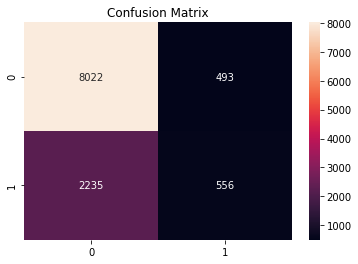

In [84]:
# ploting heatmap for confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

#### Observation

- Correct classified vaules : 7366+1808 = 9174 <br>
- Mis-classified values : 983+1149 = 2132

In [85]:
print(metrics.classification_report(y_test,y_pred_pca))

# Number of features = 20

              precision    recall  f1-score   support

         0.0       0.78      0.94      0.85      8515
         1.0       0.53      0.20      0.29      2791

    accuracy                           0.76     11306
   macro avg       0.66      0.57      0.57     11306
weighted avg       0.72      0.76      0.72     11306



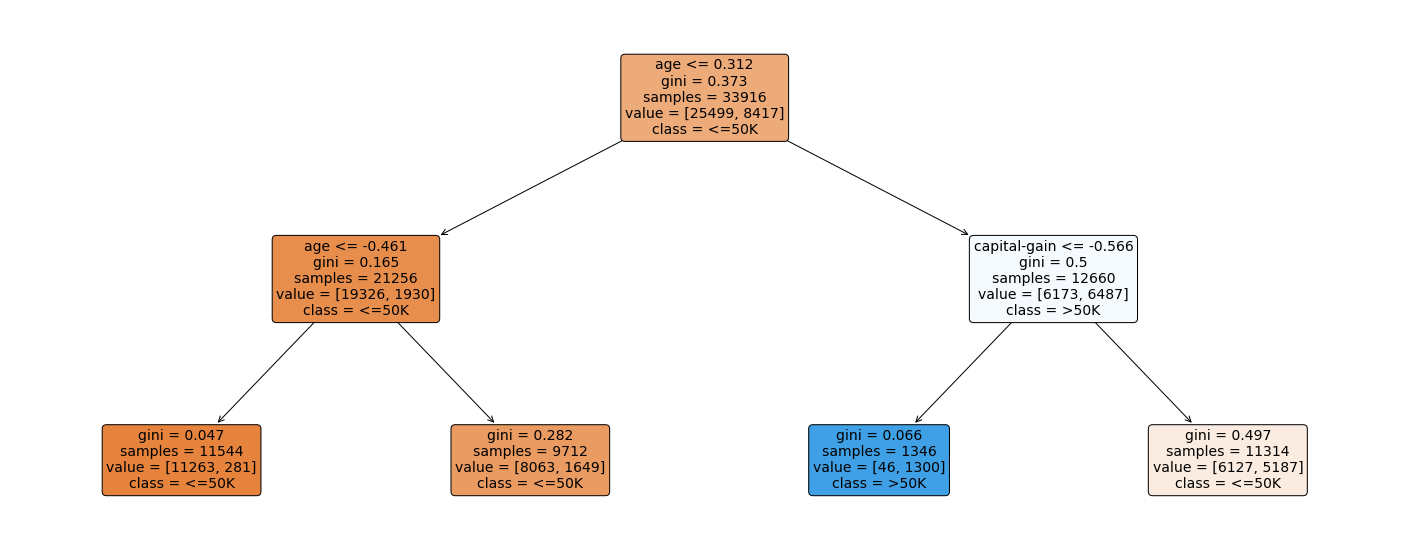

In [86]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
f = plot_tree(classifier, feature_names = X_train.columns, 
              class_names = ['<=50K', '>50K'], 
              filled = True, 
              rounded = True, 
              fontsize = 14
             )

### - SVM After PCA

In [87]:
# Building the final model with 20 features

from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_pca, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [88]:
# Predicting the model after PCA

X_test_pca = pca_final.fit_transform(X_test)
y_pred_pca = classifier.predict(X_test_pca)

In [89]:
# calculate accuracy, precision and recall of class predictions on 20 features after pca

from sklearn import metrics
svm_acc_pca = metrics.accuracy_score(y_test, y_pred_pca)
svm_pre_pca = metrics.precision_score(y_test, y_pred_pca)
svm_recall_pca = metrics.recall_score(y_test, y_pred_pca)
print("Accuracy  : "+str(svm_acc_pca))
print("Precision : "+str(svm_pre_pca))
print("Recall    : "+str(svm_recall_pca))

Accuracy  : 0.6902529630284805
Precision : 0.38942457231726285
Recall    : 0.4485847366535292


In [90]:
# Confusion Matrix

con_metric = metrics.confusion_matrix(y_test, y_pred_pca)
con_metric

array([[6552, 1963],
       [1539, 1252]], dtype=int64)

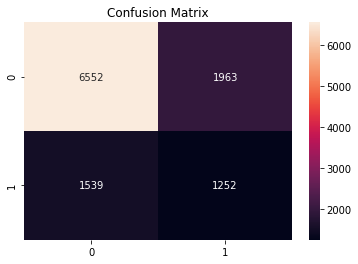

In [91]:
# ploting heatmap for confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

#### Observation

- Correct classified vaules : 7858+1233 = 9091 <br>
- Mis-classified values : 1558+657 = 2215

In [92]:
print(metrics.classification_report(y_test,y_pred_pca))

# Number of features = 20

              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79      8515
         1.0       0.39      0.45      0.42      2791

    accuracy                           0.69     11306
   macro avg       0.60      0.61      0.60     11306
weighted avg       0.71      0.69      0.70     11306



### Conclusion After PCA on 20 features

In [93]:
adult_acc={}
L = ['Logistic Regression','K-Nearest Neighbors','Decision Tree','SVM']
acc = [lr_acc_pca,knn_acc_pca,dt_acc_pca,svm_acc_pca]
for i in range(4):
  adult_acc[L[i]]=round((acc[i]*100),2)
adult_acc
acc_pca_table = pd.DataFrame.from_dict(adult_acc,orient='index',columns=['Accuracy_PCA(col=20)'])
acc_pca_table

,Accuracy_PCA(col=20)
Logistic Regression,78.77
K-Nearest Neighbors,75.16
Decision Tree,75.87
SVM,69.03


#### Observation
- On applying PCA, logistic regression is giving highest accuracy of 82.25%.

## Comparison between the accuracy calculated by diiferent models after RFE and PCA

In [94]:
comp_table=pd.concat([acc_table,acc_rfe_table,acc_pca_table],axis=1)
comp_table=comp_table.fillna('N/C')  # Here, N/C stands for not-calculated.
comp_table

,Accuracy (col=95),Accuracy_RFE (col=20),Accuracy_PCA(col=20)
Logistic Regression,85.11,83.99,78.77
K-Nearest Neighbors,83.74,N/C,75.16
Decision Tree,84.12,N/C,75.87
SVM,85.33,N/C,69.03


### Observation : 

- Using 95 features, the highest accuracy is obtained.
- After applying RFE, inspite of using only 20 features we get around 84% of accuracy.
- On doing PCA, we used only 20 columns and achieving the accuracy of 82.25%.
- RFE is giving more accurate results as compared to PCA.

## Resources
- ML class notes - By Kanav Bansal refer :- https://github.com/bansalkanav/PYTHON_ML_DS
- Geeks For Geeks refer :- https://www.geeksforgeeks.org/
- Stack Overflow 
- Python Documentation

In [95]:
print(45*'*'+"Thank You"+45*'*')

*********************************************Thank You*********************************************
